<a href='https://ai.meng.duke.edu'> = <img align="left" style="padding-top:10px;" src=https://storage.googleapis.com/aipi_datasets/Duke-AIPI-Logo.png>

# Linear Regression
Data available at https://www.statlearning.com/resources-first-edition

We are going to be working with a dataset of compiled statistics about different car models.  Our goal is to develop a model to predict fuel efficiency (mpg) based on other known characteristics of the car and engine.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
# This downloads the csv data files into the same directory where you have saved this notebook
import urllib.request
from pathlib import Path
import os
path = Path()

# Dictionary of file names and download links
files = {'Auto.csv':'https://storage.googleapis.com/aipi_datasets/Auto.csv'}

# Download each file
for key,value in files.items():
    filename = path/key
    url = value
    # If the file does not already exist in the directory, download it
    if not os.path.exists(filename):
        urllib.request.urlretrieve(url,filename)

In [3]:
def load_data(filename):
    # Read in data
    data = pd.read_csv(filename)
    # Remove rows with missing values
    data = data[data['horsepower'] != '?'].copy()
    return data

data = load_data('Auto.csv')
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


## Simple Linear Regression
Let's start with a simple linear regression and create a model for mpg using only horsepower as an input

In [4]:
def prep_data(data,pct):
    # Define the features and response (X and y)
    X = data['horsepower'].astype(int).values.reshape(-1,1)
    y = data['mpg'].astype(float)

    # Split into training and test sets
    X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=0,test_size=pct)
    return X_train,X_test,y_train,y_test

X_train,X_test,y_train,y_test = prep_data(data,pct=0.2)

In [5]:
def run_lr(X_train,y_train,X_test):
    # Let's use a Simple Linear Regression model
    model = LinearRegression()

    # Train the model on the training data
    model.fit(X_train,y_train)

    # Get the predictions
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    return train_preds, test_preds, model

MSE train: 24.430, test: 22.026


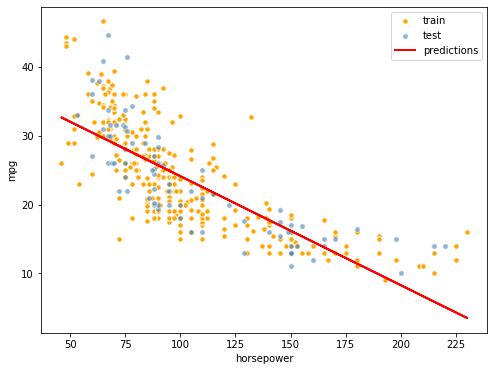

In [6]:
train_preds, test_preds, model = run_lr(X_train,y_train,X_test)

# Calculate MSE
train_mse = 1/len(y_train)*np.sum((train_preds-y_train)**2)
test_mse = 1/len(y_test)*np.sum((test_preds-y_test)**2)
print('MSE train: {:.3f}, test: {:.3f}'.format(train_mse,test_mse))

# Look at how well the model is fitting the data
plt.figure(figsize=(8,6))
plt.scatter(X_train,y_train,color='orange',edgecolor='white',s=30,label='train') # Plot training data
plt.scatter(X_test,y_test,color='steelblue',edgecolor='white',s=30,alpha=0.6,label='test') # Plot test data
plt.plot(X_train,train_preds,color='red',lw=2,label='predictions') # Plot predictions
plt.xlabel('horsepower')
plt.ylabel('mpg')
plt.legend()
plt.show()

## Multiple Linear Regression
Now let's create a new model using additional numerical features

In [7]:
def prep_data_allfeats(data,pct):
    # Define the features and response (X and y)
    X = data[['cylinders','displacement','horsepower','weight','acceleration','year']].copy().astype(int)
    y = data['mpg'].copy().astype(float)

    # Split into training and test sets
    X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=0,test_size=pct)
    return X_train,X_test,y_train,y_test

In [8]:
# Split our data and run the model
X_train,X_test,y_train,y_test = prep_data_allfeats(data,pct=0.2)
train_preds, test_preds, model = run_lr(X_train,y_train,X_test)

# Calculate MSE
train_mse = 1/len(y_train)*np.sum((train_preds-y_train)**2)
test_mse = 1/len(y_test)*np.sum((test_preds-y_test)**2)
print('MSE train: {:.3f}, test: {:.3f}'.format(train_mse,test_mse))

MSE train: 11.539, test: 11.953


In [9]:
# Look at the coefficients of our model
coef = model.coef_
intercept = model.intercept_

# Print out the equation
equation = 'y = {:.3f} + '.format(intercept) + ' + '.join(['{:.3f}*{}'.format(coef,var) for coef,var in zip(coef,X_train.columns)])
print(equation)

y = -14.813 + -0.243*cylinders + 0.007*displacement + 0.005*horsepower + -0.007*weight + 0.154*acceleration + 0.742*year


## Check for violations of linear regression assumptions

### Check for linearity of features-target relationship

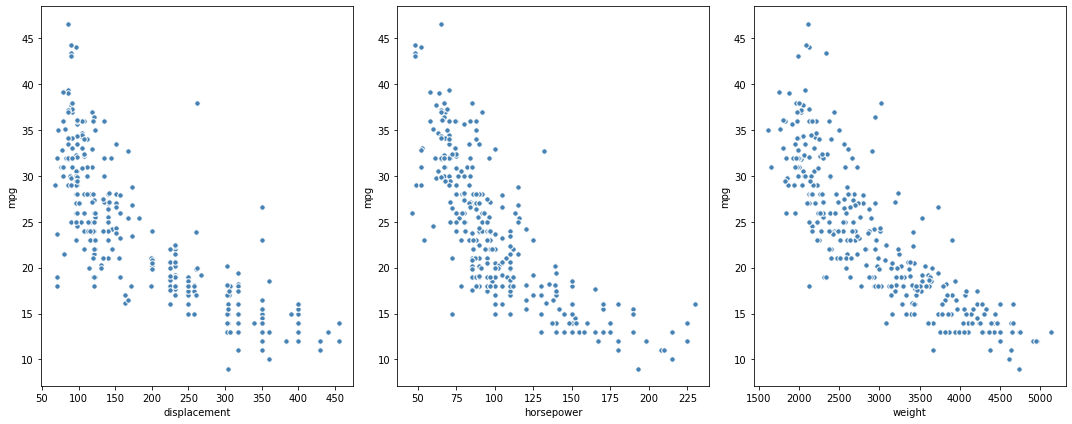

In [10]:
# Check for linearity of features-target relationship - plot scatterplots of features vs target
fig,ax = plt.subplots(1,3,figsize=(15,6))
for i,var in enumerate(['displacement','horsepower','weight']):
    ax_sub=ax[i%3]
    ax_sub.scatter(X_train[var],y_train,color='steelblue',edgecolor='white',s=30)
    ax_sub.set_xlabel(var)
    ax_sub.set_ylabel('mpg')

plt.tight_layout()
plt.show()

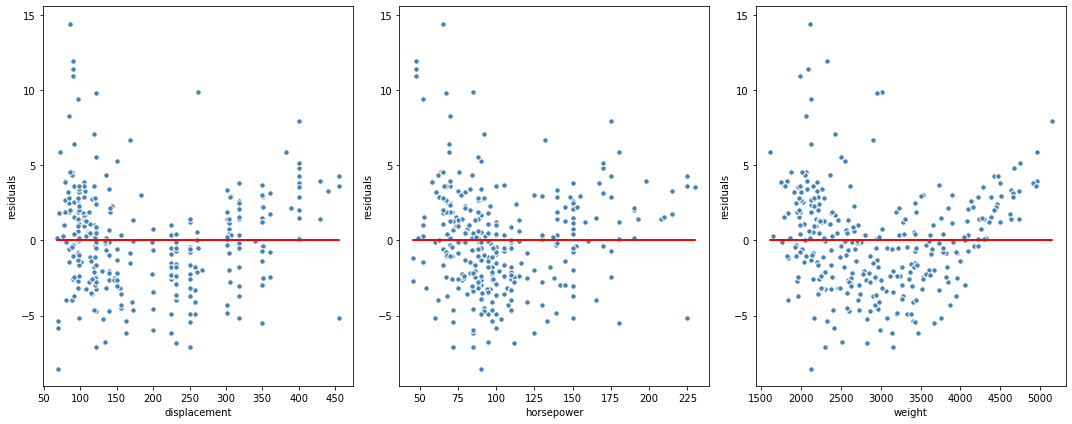

In [11]:
# Check for linearity of features-target relationship - plot residuals vs features
resids = y_train - train_preds

fig,ax = plt.subplots(1,3,figsize=(15,6))
for i,var in enumerate(['displacement','horsepower','weight']):
    ax_sub=ax[i%3]
    ax_sub.scatter(X_train[var],resids,color='steelblue',edgecolor='white',s=30)
    ax_sub.plot(X_train[var],np.zeros(shape=len(X_train[var])),color='red')
    ax_sub.set_xlabel(var)
    ax_sub.set_ylabel('residuals')

plt.tight_layout()
plt.show()

### Check for constant variance of error

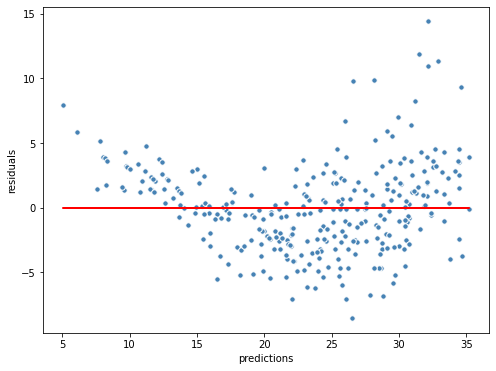

In [12]:
# Plot the residuals vs. the fitted values
plt.figure(figsize=(8,6))
plt.scatter(train_preds,resids,color='steelblue',edgecolor='white',s=30)
plt.plot(train_preds,np.zeros(shape=len(train_preds)),color='red')
plt.xlabel('predictions')
plt.ylabel('residuals')
plt.show()

### Check for collinearity of features

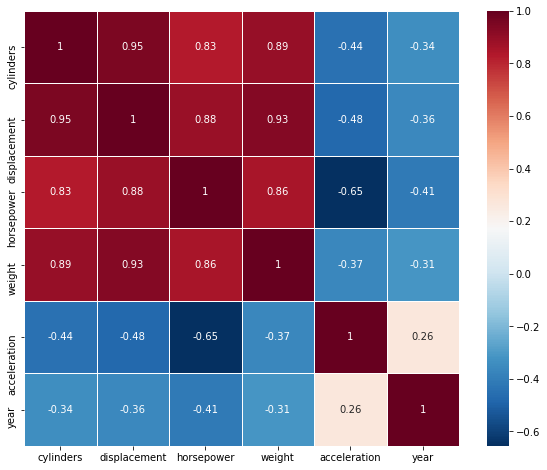

In [13]:
# Examine correlations between variables using correlation matrix
plt.figure(figsize=(10,8))
cm = X_train.corr(method='pearson')
sns.heatmap(cm, annot=True, cmap = 'RdBu_r',linewidth=0.5,square=True)
plt.show()